In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install -r /content/drive/MyDrive/ITVD/Requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 125.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 90.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 50.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from collections import Counter
import matplotlib.image as mpimg
import os

In [ ]:
yaml_path = '/content/drive/MyDrive/ITVD/Dataset/coco128.yaml'

with open(yaml_path, 'r') as file:
    yaml_contents = file.read()

print(yaml_contents)

train: /train/images
val: /val/images

nc: 4

names: ["with helmet", "without helmet", "rider", "number plate"]


In [ ]:
# Function to count class instances in a given folder
def count_class_instances(folder_path):
    labels_folder = Path(folder_path) / 'labels'
    class_counts = Counter()

    for label_file in labels_folder.glob('*.txt'):
        with open(label_file, 'r') as file:
            annotations = file.readlines()
            for annotation in annotations:
                class_id = int(annotation.split()[0])
                class_counts[class_id] += 1

    return class_counts

# Example usage
train_class_counts = count_class_instances('/content/drive/MyDrive/ITVD/Dataset/train')
val_class_counts = count_class_instances('/content/drive/MyDrive/ITVD/Dataset/val')

In [ ]:
print("Train Counts: ",train_class_counts)
print("Validation Counts: ",val_class_counts)

Train Counts:  Counter({2: 120, 3: 116, 1: 93, 0: 64})
Validation Counts:  Counter({2: 23, 3: 22, 1: 15, 0: 13})


In [ ]:
# Function for augmenting images (horizontal flip and brightness adjustment)
def augment_image(image):
    flipped = cv2.flip(image, 1)

    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    v = cv2.add(v, np.random.randint(30, 70))
    final_hsv = cv2.merge((h, s, v))
    bright_adjusted = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)

    return flipped, bright_adjusted

In [ ]:
# Function to demonstrate augmentation on a sample image
def demonstrate_augmentation(folder_path, class_id=0):
    labels_folder = Path(folder_path) / 'labels'
    images_folder = Path(folder_path) / 'images'

    for label_file in labels_folder.glob('*.txt'):
        with open(label_file, 'r') as file:
            annotations = file.readlines()
            if any(int(ann.split()[0]) == class_id for ann in annotations):
                image_name = label_file.stem
                image_path = images_folder / f'{image_name}.jpg'
                img = cv2.imread(str(image_path))
                flipped, bright_adjusted = augment_image(img)
                return img, flipped, bright_adjusted

    return None, None, None

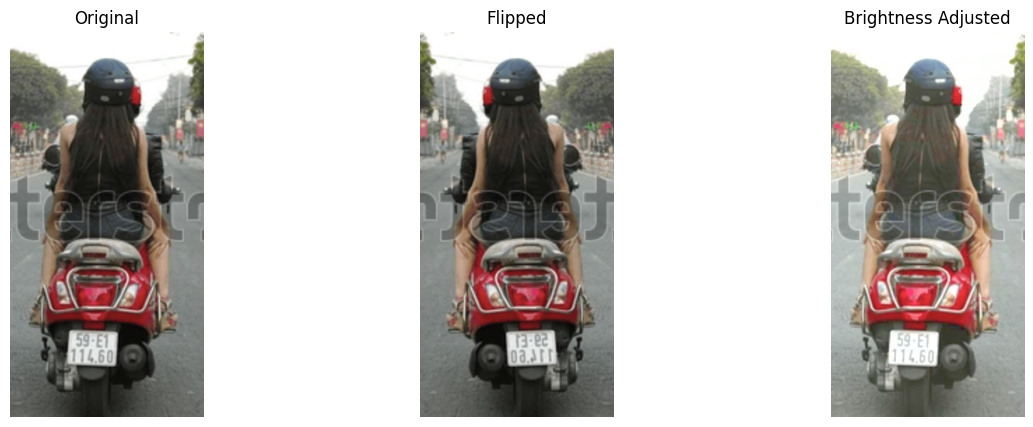

In [ ]:
# Displaying the original and augmented images
original, flipped, bright_adjusted = demonstrate_augmentation('/content/drive/MyDrive/ITVD/Dataset/train')
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(flipped, cv2.COLOR_BGR2RGB))
axes[1].set_title('Flipped')
axes[1].axis('off')

axes[2].imshow(cv2.cvtColor(bright_adjusted, cv2.COLOR_BGR2RGB))
axes[2].set_title('Brightness Adjusted')
axes[2].axis('off')

plt.show()

In [ ]:

# Create a YAML file for your dataset
data_yaml_content = """
train: /content/drive/MyDrive/ITVD/Dataset/train/images
val: /content/drive/MyDrive/ITVD/Dataset/val/images

nc: 4
names: ['with helmet', 'without helmet', 'rider', 'number plate']
"""

# Write the dataset configuration to a YAML file
with open('data.yaml', 'w') as file:
    file.write(data_yaml_content)


In [ ]:
!python /content/drive/MyDrive/ITVD/Output/yolov5/train.py --img 640 --batch 16 --epochs 50 \
    --data data.yaml --cfg yolov5s.yaml \
    --weights yolov5s.pt --name yolov5_rider_safety

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-05-17 05:08:09.663870: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747458489.904283    1810 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747458489.970535    1810 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS wh

In [ ]:
# prompt: Results are in csv. Generate accuracy

import pandas as pd

def calculate_accuracy(csv_file_path):
    """Calculates the accuracy from a CSV file containing predictions and ground truth.

    Args:
        csv_file_path (str): The path to the CSV file.

    Returns:
        float: The accuracy, or None if there's an error.
    """
    try:
        df = pd.read_csv(csv_file_path)
        # Assuming the CSV has columns named 'prediction' and 'ground_truth'
        correct_predictions = (df['prediction'] == df['ground_truth']).sum()
        total_predictions = len(df)
        accuracy = (correct_predictions / total_predictions) * 100
        return accuracy
    except FileNotFoundError:
        print(f"Error: File not found at {csv_file_path}")
        return None
    except KeyError:
        print("Error: 'prediction' or 'ground_truth' column not found in the CSV.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None
# Example usage: replace 'results.csv' with your actual file path
accuracy = calculate_accuracy('/content/drive/MyDrive/ITVD/Output/yolov5/runs/train/yolov5_rider_safety3/results.csv')
if accuracy is not None:
    print(f"Accuracy: {accuracy:.2f}%")


Error: 'prediction' or 'ground_truth' column not found in the CSV.


In [ ]:
# Command for testing the model on new data
!python /content/drive/MyDrive/ITVD/Output/yolov5/detect.py --weights /content/drive/MyDrive/ITVD/Output/yolov5/runs/train/yolov5_rider_safety3/weights/best.pt \
                  --img 640 --conf 0.4 --source /content/drive/MyDrive/ITVD/Dataset/val/images

detect: weights=['/content/drive/MyDrive/ITVD/Output/yolov5/runs/train/yolov5_rider_safety3/weights/best.pt'], source=/content/drive/MyDrive/ITVD/Dataset/val/images, data=drive/MyDrive/ITVD/Output/yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=drive/MyDrive/ITVD/Output/yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-294-gdb125a20 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/20 /content/drive/MyDrive/ITVD/Dataset/val/images/new0.jpg: 640x576 2 without helmets, 1 number plate, 27.4ms
image 2/20 /content/drive/MyDrive/ITVD/Dataset/val/images/

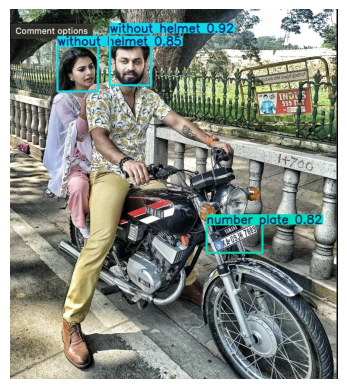

In [ ]:
# Directory where the output images are saved
output_directory = '/content/drive/MyDrive/ITVD/Output/yolov5/runs/detect/exp3'

# List all files in the output directory
output_files = os.listdir(output_directory)
if output_files:
    # Display the first output image as an example
    first_image_path = os.path.join(output_directory, output_files[0])
    img = mpimg.imread(first_image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
else:
    print("No output files found.")